# IMT3860 - Introducción a Data Science

# Aprendizaje Supervisado - Regresión Lineal


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Displays the plots for us.
%matplotlib inline

##  1. Regresión Lineal Simple con `statsmodels` y `sklearn`

Para implementar regresiones lineales y predecir los outcomes para distintas variables de entrada, podemos usar dos librerías de `python`:

* [statsmodels](http://www.statsmodels.org/stable/regression.html) and 
* [scikit-learn (sklearn)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Para efectos de regresiones lineales simples, `statsmodels` y `sklearn` hacen lo mismo. Más en general,  `statsmodels` tiende a ser más fácil para problemas de inferencia (econtrar los parámetros de la regresión y analizar sus incertezas) mientras que  `sklearn` tiene un enfoque de machine learning y es más práctico para realizar predicciones.


`sklearn` es la principal librería de `Python` para machine learning. Consiste de muchos algoritmos que pueden aprender modelos a partir de datos, además de funciones útiles como `train_test_split()`. En `sklearn`, un estimador es un objeto Python que implementa los métodos  `fit(X, y)` y `predict(T)`


### Caso de Estudio.

Para este ejercicio, tenemos como ejemplo un dataset con datos de automóviles antiguos, extraidos de la revista estadounidense *Motor Trend* de 1974. Los datos incluyen datos sobre 10 características del diseño e ingeniería de 32 modelos antiguos, como se describe a continuación:

- `mpg`: rendimiento de combustible en millas/galón. 
- `cyl`: número de cilindros. is Number of cylinders, 
- `disp`: desplazamiento (cu.in.), 
- `hp`: potencia en "caballos de fuerza". 
- `drat`: razón de eje trasero. 
- `wt`: peso (en miles de libras).
- `qsec`: tiempo en recorrer 1/4 de milla desde el reposo.
- `vs`: motor (0 = V-shaped, 1 = straight). 
- `am`: transmisión (0 = automática, 1 = manual), 
- `gear`: número de cambios (forward). 
- `carb`: número de carburadores.

El objetivo es predecir el consumo de un vehículo de la misma época, en función de sus parámetros de diseño e ingeniería. Para ello, complete los siguientes pasos:

1. Explore los datos y las posibles relaciones entre las variables que caracterizan un auto, y su consumo de combustible.
2. Separe los datos en una muestra de entrenamiento y una de prueba.
3. Use `statsmodel` para ajustar los datos de entrenamiento usando una regresión lineal simple. 
4. Use `sklearn` para ajustar los datos de entrenamiento usando una regresión lineal simple. 
5. Use el modelo para predecir `mpg` para el dataset de prueba. 
6. Obtenga el error cuadrático medio para el dataset de entrenamiento y de prueba, y compare.
7. Grafique los datos y las predicciones.



### 1.1 Explore los datos y las posibles relaciones entre las variables que caracterizan un auto, y su consumo de combustible.

In [2]:
import pandas as pd

#load mtcars
dfcars = pd.read_csv("mtcars.csv")
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
# Corregimos el nombre de la primera columa (siempre hay algo por limpiar...) 
dfcars = dfcars.rename(columns={"Unnamed: 0":"car_name"})
dfcars.head()

,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
dfcars.shape

(32, 12)

#### Exploremos los datos: ¿cuál es el rendimiento promedio para distintas combinaciones de cilindros y hp?

In [5]:
pv=pd.pivot_table(dfcars, index='gear',columns=['cyl'],values=['mpg'],aggfunc=[np.mean,np.std])
pv

mean                    std                    
         mpg                    mpg                    
cyl        4      6      8        4         6         8
gear                                                   
3     21.500  19.75  15.05      NaN  2.333452  2.774396
4     26.925  19.75    NaN  4.80736  1.552417       NaN
5     28.200  19.70  15.40  3.11127       NaN  0.565685

#### ¿Cuál es la relación entre rendimiento promedio y las demás variables?

Vamos a dividir los datos aleatoriamente en un set de entrenamiento, y un set de prueba:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


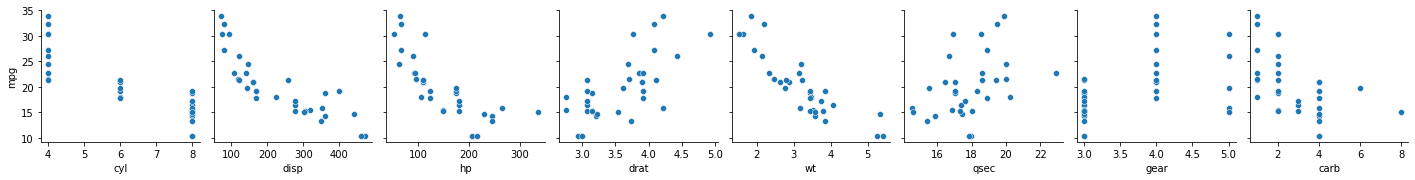

In [6]:
import seaborn as sns

sns.pairplot(dfcars,x_vars=['cyl','disp','hp','drat','wt','qsec','gear','carb'],y_vars=['mpg'])
plt.show()

### 1.2 Separe los datos en una muestra de entrenamiento y una de prueba.


In [7]:
# split into training set and testing set
from sklearn.model_selection import train_test_split

#set random_state to get the same split every time
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42) #para reproducir resultados

In [8]:
# testing set is around 20% of the total data; training set is around 80%
print("Shape del dataset completo:",dfcars.shape,)
print("Shape del dataset de entrenamiento: ",traindf.shape)
print("Shape del dataset de prueba:",testdf.shape)

Shape del dataset completo: (32, 12)
Shape del dataset de entrenamiento:  (25, 12)
Shape del dataset de prueba: (7, 12)


Ya tenemos nuestros dataset de entrenamiento y de prueba. Ahora necesitamos seleccionar un predictor (variable independiente) y una respuesta (variable dependiente o outcome) para este dataset (para *ambos* datasets).


In [9]:
traindf.head()

,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [10]:
# El vector y corresponde a la variable que queremos predecir: mpg 
y_train = traindf.mpg
y_train

25    27.3
12    17.3
0     21.0
4     18.7
16    14.7
5     18.1
13    15.2
11    16.4
23    13.3
1     21.0
2     22.8
26    26.0
3     21.4
21    15.5
27    30.4
22    15.2
18    30.4
31    21.4
20    21.5
7     24.4
10    17.8
14    10.4
28    15.8
19    33.9
6     14.3
Name: mpg, dtype: float64

### 1.3 Use `statsmodel` para ajustar los datos de entrenamiento usando una regresión lineal simple. 

- Nota sobre constantes:

Supongamos un caso sencillo, en que tenemos 2 observaciones con un predictor y una variable de respuesta cada una. Tendríamos por lo tanto el siguiente sistema de ecuaciones para el modelo de regresión lineal simple:
 $$y_1=\beta_0 + \beta_1*x_1$$ $$y_2=\beta_0 + \beta_1*x_2$$ <BR>
    
En notación matricial, esto sería: 
    
$$
\left [
\begin{array}{c}
y_1 \\ y_2 \\
\end{array}
\right] =
\left [
\begin{array}{cc}
1& x_1 \\ 1 & x_2 \\
\end{array}
\right] 
\cdot
\left [
\begin{array}{c}
\beta_0 \\ \beta_1 \\
\end{array}
\right]
$$
<BR><BR>
    
`sklearn` agrega automáticamente la constante `1`, mientras que en  `statsmodels` hay que agregarla explícitamente usando `sm.add_constant`

In [11]:
import statsmodels.api as sm

y_train = np.array(traindf.mpg)
x_train = np.array(traindf.wt)

# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

# build the OLS model (ordinary least squares) from the training data
regr_sm = sm.OLS(y_train, X)

# do the fit and save regression info (parameters, etc) in results_sm
results_sm = regr_sm.fit()

# pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print(f'Coeficientes de la regresión (statsmodel): beta_0 = {beta0_sm:8.6f} and beta_1 = {beta1_sm:8.6f}')


Coeficientes de la regresión (statsmodel): beta_0 = 36.937310 and beta_1 = -5.336941


### 1.4 Use `sklearn` para ajustar los datos de entrenamiento usando una regresión lineal simple. 

- Nota sobre inputs para `sklearn`:

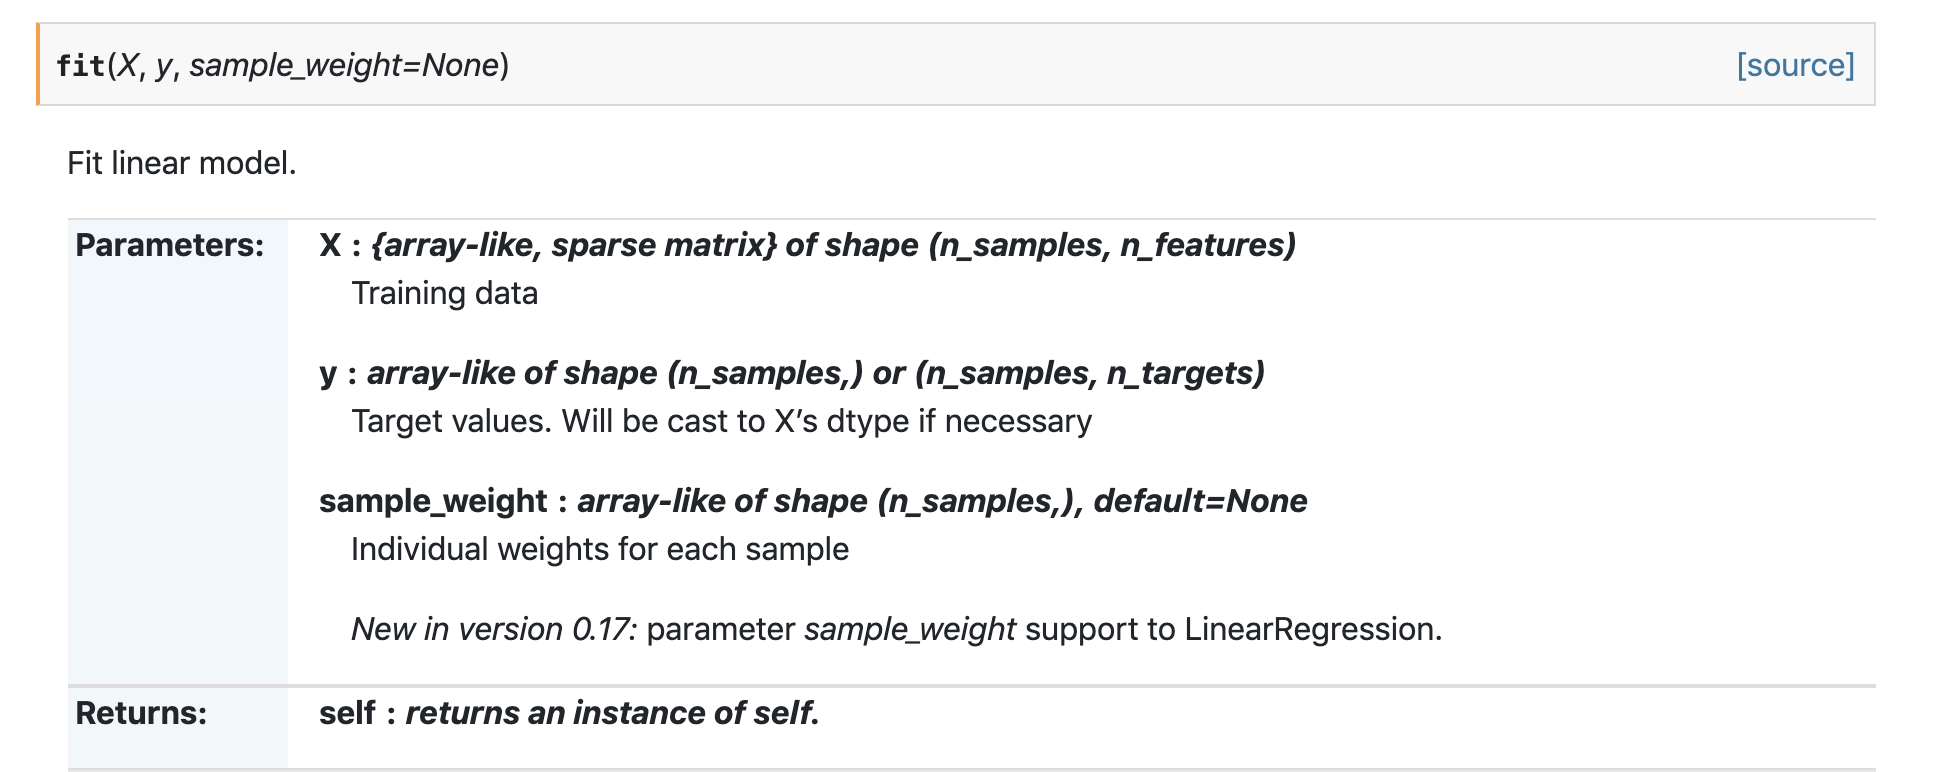


El método `.fit`de `sklearn`recibe dos argumentos :`X`(arreglo de variables dependientes o features) e `y` (vector de outcomes).

El arreglo `y` es un vector 1D, pero el argumento `X` requiere siempre un arreglo 2D (aunque haya sólo 1 feature).


In [12]:
y_train = np.array(traindf.mpg)
X_train = np.array(traindf.wt)

print(X_train,X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 1)
print(X_train,X_train.shape)

[1.935 3.73  2.62  3.44  5.345 3.46  3.78  4.07  3.84  2.875 2.32  2.14
 3.215 3.52  1.513 3.435 1.615 2.78  2.465 3.19  3.44  5.25  3.17  1.835
 3.57 ] (25,)
[[1.935]
 [3.73 ]
 [2.62 ]
 [3.44 ]
 [5.345]
 [3.46 ]
 [3.78 ]
 [4.07 ]
 [3.84 ]
 [2.875]
 [2.32 ]
 [2.14 ]
 [3.215]
 [3.52 ]
 [1.513]
 [3.435]
 [1.615]
 [2.78 ]
 [2.465]
 [3.19 ]
 [3.44 ]
 [5.25 ]
 [3.17 ]
 [1.835]
 [3.57 ]] (25, 1)


In [13]:
y_test = np.array(testdf.mpg)
X_test = np.array(testdf.wt)
X_test = X_test.reshape(X_test.shape[0], 1)
y_test.shape, X_test.shape

((7,), (7, 1))

In [14]:
from sklearn.linear_model import LinearRegression

#crear modelo lineal
regression =LinearRegression()

#fit 
regression.fit(X_train, y_train)
R2_lineal_train=regression.score(X_train, y_train)
print(r'R^2 (train)',R2_lineal_train)
print('Coeficientes: \n', regression.coef_[0], regression.intercept_)




R^2 (train) 0.7701379909791616
Coeficientes: 
 -5.336941400557079 36.93731031351841


### 1.5 Use el modelo para predecir `mpg` para el dataset de prueba. 

In [15]:
#predecir valores de y para el set de prueba
y_predict = regression.predict(X_test)
R2_lineal_test=regression.score(X_test, y_test)
print(r'R^2 (test)',R2_lineal_test)


R^2 (test) 0.6879761857596277


### 1.6 Obtenga el error cuadrático medio para el dataset de entrenamiento y de prueba, y compare.

Para esto, usamos el módulos `metrics`de `sklearn`:

https://scikit-learn.org/stable/modules/model_evaluation.html


In [16]:
from sklearn.metrics import mean_squared_error

print('MSE train:',mean_squared_error(y_train, regression.predict(X_train)))
print('MSE test:',mean_squared_error(y_predict, y_test))


MSE train: 7.7736977663875155
MSE test: 12.475985659918818


### 1.7 Grafique los datos y las predicciones.

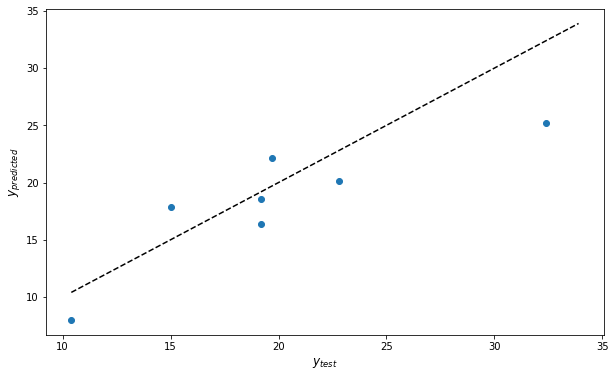

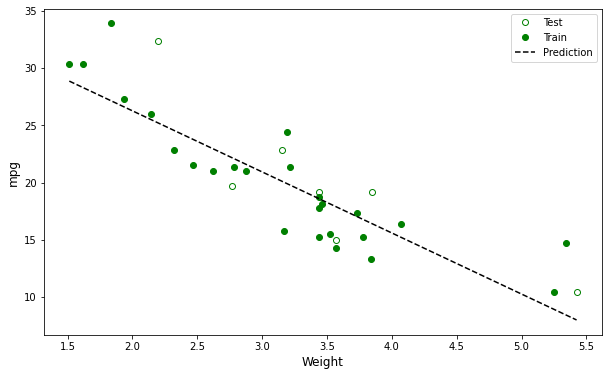

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(y_test, y_predict, 'o')
grid = np.linspace(np.min(dfcars.mpg), np.max(dfcars.mpg), 100)
ax.plot(grid, grid, color="black",ls='--') # diagonal
ax.set_xlabel(r"$y_{test}$", fontsize=12)
ax.set_ylabel(r"$y_{predicted}$", fontsize=12)

fig1, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1.plot(testdf.wt, testdf.mpg, 'o',mec='green',mfc='None',label='Test') 
ax1.plot(traindf.wt, traindf.mpg, 'o',color='green',label='Train') 

xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
ax1.plot(xgrid, regression.predict(xgrid.reshape(100, 1)),label='Prediction',color='k',ls='--')
ax1.set_xlabel("Weight", fontsize=12)
ax1.set_ylabel("mpg", fontsize=12)
ax1.legend()

## 2. Regresión  Polinomial.

En una regresión polinomial, usamos un **modelo lineal** para estimar una **función no lineal** (i.e., una función con términos polinomiales). Por ejemplo, 

$y = \beta_0 + \beta_1x_i + \beta_2x_i^{2}$

Es un modelo _lineal_ porque resolvemos una ecuación lineal para obtener los coeficientes $\beta$.


In [18]:
from sklearn.preprocessing import PolynomialFeatures
print(X_train)
transformer = PolynomialFeatures(2, include_bias=False)
expanded_train = transformer.fit_transform(X_train) # TRANSFORMS it to polynomial features
pd.DataFrame(expanded_train) # notice that the columns now contain x, x^2, x^3 values




[[1.935]
 [3.73 ]
 [2.62 ]
 [3.44 ]
 [5.345]
 [3.46 ]
 [3.78 ]
 [4.07 ]
 [3.84 ]
 [2.875]
 [2.32 ]
 [2.14 ]
 [3.215]
 [3.52 ]
 [1.513]
 [3.435]
 [1.615]
 [2.78 ]
 [2.465]
 [3.19 ]
 [3.44 ]
 [5.25 ]
 [3.17 ]
 [1.835]
 [3.57 ]]


,0,1
0,1.935,3.744225
1,3.730,13.912900
2,2.620,6.864400
3,3.440,11.833600
4,5.345,28.569025
5,3.460,11.971600
6,3.780,14.288400
7,4.070,16.564900
8,3.840,14.745600
9,2.875,8.265625


In [19]:
reg_poly = LinearRegression().fit(expanded_train, y_train)
y_pred_train = reg_poly.predict(expanded_train)

expanded_test = transformer.fit_transform(X_test) # TRANSFORMS it to polynomial features
print('Expanded test:',expanded_test[:,0])
y_pred_test = reg_poly.predict(expanded_test)
print('Predicted test:',y_pred_test)

Expanded test: [2.77  5.424 3.845 2.2   3.15  3.44  3.57 ]
Predicted test: [21.29163261 12.65686997 15.53059909 25.59668496 18.9029945  17.33918728
 16.71097985]


In [20]:
def predict_model(poly_model,x_vals, poly_transformer=None):

    # optionally use the passed-in transformer
    if poly_transformer != None:
        dm = poly_transformer.fit_transform(x_vals)
    else:
        dm = x_vals
        
    # make the prediction at each x value
    prediction = poly_model.predict(dm)
    
    return(prediction)

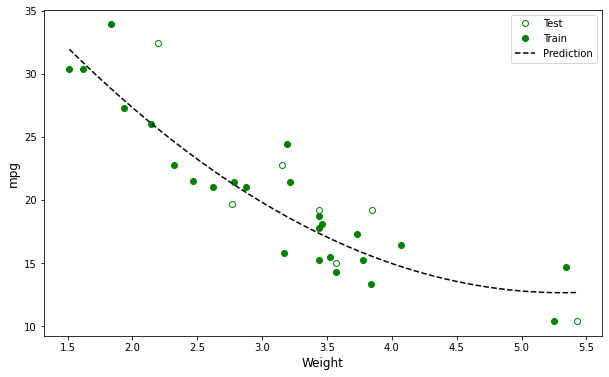

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(testdf.wt, testdf.mpg, 'o',mec='green',mfc='None',label='Test') 
ax.plot(traindf.wt, traindf.mpg, 'o',color='green',label='Train') 

x_vals = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100).reshape(-1,1)
prediction=predict_model(reg_poly,x_vals,transformer)

ax.plot(x_vals,prediction,label='Prediction',color='k',ls='--')
ax.set_xlabel("Weight", fontsize=12)
ax.set_ylabel("mpg", fontsize=12)
ax.legend()

In [22]:
expanded_test = transformer.fit_transform(X_test)
print("R-squared polynomial (test):", reg_poly.score(expanded_test, y_test))

R-squared polynomial (test): 0.6821839404663559


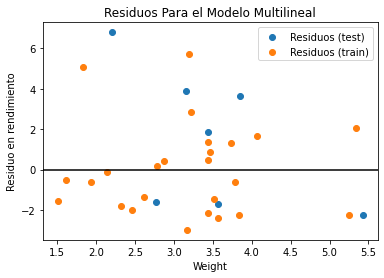

In [23]:
residual_test = y_test-y_pred_test
residual_train = y_train-y_pred_train

plt.scatter(testdf.wt, residual_test,label="Residuos (test)")
plt.scatter(traindf.wt, residual_train, label="Residuos (train)")

plt.axhline(0, color='k')

plt.title("Residuos Para el Modelo Multilineal")
plt.ylabel("Residuo en rendimiento")
plt.xlabel("Weight")
plt.legend()

## 3. Regresión multilineal.

Supongamos ahora un modelo incluyendo múltiples variables:

$$\text{mpg} \approx \beta_0 + \beta_1\text{disp} + \beta_2\text{hp} + \beta_3\text{wt} +\beta_4\text{wt}^2 $$


In [24]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

#Repetimos para recordar los datos
dfcars = pd.read_csv("mtcars.csv")
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42) #para reproducir resultados

y_train = np.array(traindf.mpg)
y_test = np.array(testdf.mpg)
traindf.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [25]:
def build_xmatrix(df,columns,cols_squared=[]):
    x_matrix = df[columns].copy()
    
    for col in cols_squared:
        x_matrix['%s_squared'%col] = df[col]**2
    
    x_matrix = sm.add_constant(x_matrix)
    return(x_matrix)

In [26]:
columns=['disp','hp','wt']
cols_squared=['wt']

x_matrix_train=build_xmatrix(traindf,columns,cols_squared)
x_matrix_test=build_xmatrix(testdf,columns,cols_squared)


x_matrix_train.head()

,const,disp,hp,wt,wt_squared
25,1.0,79.0,66,1.935,3.744225
12,1.0,275.8,180,3.730,13.912900
0,1.0,160.0,110,2.620,6.864400
4,1.0,360.0,175,3.440,11.833600
16,1.0,440.0,230,5.345,28.569025


In [27]:
import statsmodels.api as sm
from statsmodels.api import OLS

fitted_model= OLS(endog= y_train, exog=x_matrix_train, hasconst=True).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     46.89
Date:                Wed, 17 May 2023   Prob (F-statistic):           6.93e-10
Time:                        10:57:16   Log-Likelihood:                -50.240
No. Observations:                  25   AIC:                             110.5
Df Residuals:                      20   BIC:                             116.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.7146      3.644     13.369      0.000      41.114      56.315
disp          -0.0046      0.011     -0.399      0.694      -0.028       0.019
hp            -0.0260      0.015     -1.784      0.090      -0.056       0.004
wt           -11.8406      2.320     -5.103      0.000     -16.680      -7.001
wt_squared     1.2373      0.321      3.852      0.001       0.567       1.907
==============================================================================
Omnibus:                        3.200   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.108
Skew:                           0.708   Prob(JB):                        0.349
Kurtosis:                       3.131   Cond. No.                     3.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
from sklearn.metrics import r2_score
predict_test=fitted_model.predict(x_matrix_test)
r2_score(y_test, predict_test)


0.7419393958899635

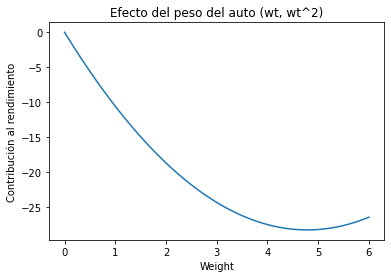

In [29]:
wtcoef = fitted_model.params.wt
wt2coef = fitted_model.params.wt_squared


x_vals = np.linspace(0,6,1000)
y_vals = wtcoef*x_vals +wt2coef*x_vals**2

plt.plot(x_vals, y_vals)
plt.title("Efecto del peso del auto (wt, wt^2)")
plt.xlabel("Weight")
plt.ylabel("Contribución al rendimiento")
plt.show()




##  3. Regresión KNN.

Ahora que tenemos experiencia con `sklearn`, probaremos una regresión KNN  

El método disponible en `sklearn` es `sklearn.neighbors.KNeighborsRegressor`. Su parámetro principal es el  `número de vecinos más cercanos`. Hay otros parámetros como la métrica de distancia (default es la distancia Euclideana). Para ver todos los parámetros, revise la documentación en: [Sklearn kNN Regressor Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).

Primero, probaremos usando 5 vecinos más cercanos.

In [30]:
# Importar
from sklearn.neighbors import KNeighborsRegressor

#Repetimos para recordar los datos
dfcars = pd.read_csv("mtcars.csv")
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42) #para reproducir resultados

y_train = np.array(traindf.mpg)
y_test = np.array(testdf.mpg)

X_train = np.array(traindf.wt)
X_train = X_train.reshape(X_train.shape[0], 1)

X_test = np.array(testdf.wt)
X_test = X_test.reshape(X_test.shape[0], 1)


In [31]:
# Fijar número de vecinos
k = 5
knnreg = KNeighborsRegressor(n_neighbors=k)

In [32]:
# Fit the regressor - make sure your numpy arrays are the right shape
knnreg.fit(X_train, y_train)

# Evaluate the outcome on the train set using R^2
r2_train = knnreg.score(X_train, y_train)

y_predict=knnreg.predict(X_test)
r2_test = knnreg.score(X_test, y_predict)

print(f'Modelo kNN con %d vecinos:  R^2 (train)=%.2f'%(k,r2_train))
print(f'Modelo kNN con %d vecinos:  R^2 (test)=%.2f'%(k,r2_test))

Modelo kNN con 5 vecinos:  R^2 (train)=0.87
Modelo kNN con 5 vecinos:  R^2 (test)=1.00


¿No estamos conformes con el modelo? Probemos con distintos valores de `k`. 

In [33]:
# Diccionario para guardar las regresiones
regdict = {}

# Valores de k a probar
k_list = [1, 2, 4,5, 15]

# Iteración para k
for k in k_list:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, y_train)
    # Guardamos regresiones en el diccionario
    regdict[k] = knnreg 

# Print al diccionario para ver que obtuvimos
regdict

{1: KNeighborsRegressor(n_neighbors=1),
 2: KNeighborsRegressor(n_neighbors=2),
 4: KNeighborsRegressor(n_neighbors=4),
 5: KNeighborsRegressor(),
 15: KNeighborsRegressor(n_neighbors=15)}

Ahora grafiquemos todas las regresiones en un mismo plot:

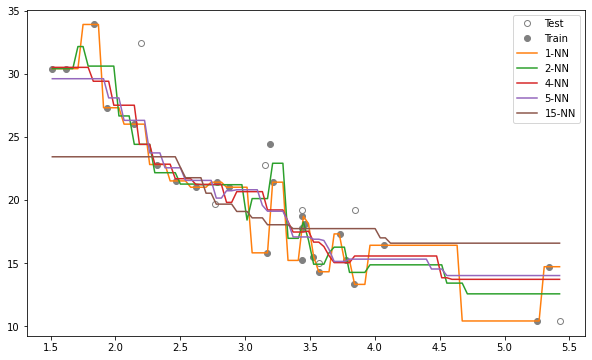

In [34]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(testdf.wt, testdf.mpg, 'o',mec='gray',mfc='None',label='Test') 
ax.plot(traindf.wt, traindf.mpg, 'o',color='gray',label='Train') 

xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)

# let's unpack the dictionary to its elements (items) which is the k and Regressor
for k, regressor in regdict.items():
    predictions = regressor.predict(xgrid.reshape(-1,1)) 
    ax.plot(xgrid, predictions, label="{}-NN".format(k))


ax.legend();

Notar que el modelo para $1$-NN pasa por cada punto del dataset de entrenamiento pero falla en todos los demás. 

Text(0, 0.5, '$R^{2}$')

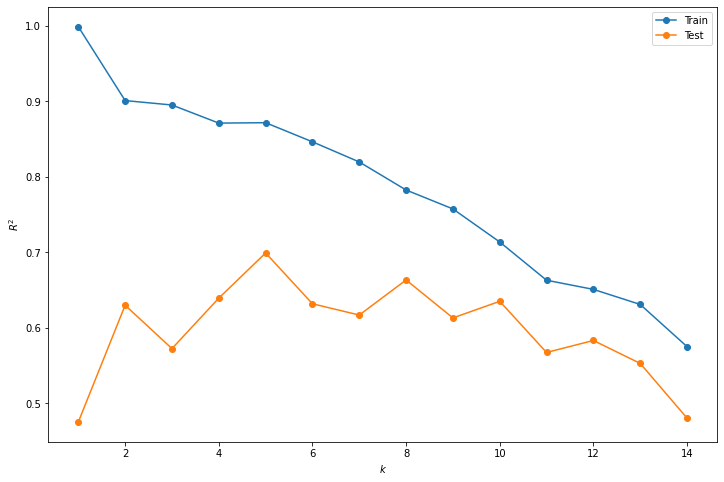

In [35]:
ks = range(1, 15) # Lista de  k's
scores_train = [] # R2 train
scores_test = [] # R2 test

for k in ks:
    # Crear modelo KNN 
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit 
    knnreg.fit(X_train, y_train) 
    
    # Calcular R^2 train
    score_train = knnreg.score(X_train, y_train) 
    scores_train.append(score_train)
    
    # Calcular R^2 test
    score_test = knnreg.score(X_test, y_test) 
    scores_test.append(score_test)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-',label='Train')
ax.plot(ks, scores_test,'o-',label='Test')
ax.legend()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')

¿Cuál es el mejor `k`? 

**Créditos:** Pavlos Protopapas, Kevin Rader, and Chris Tanner, Harvard CS109A.
